Machine Learning - M2-U10

Exercício 1: Redes neuronais: Regressão linear

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# 1. Carregar o Dataset California Housing
data = fetch_california_housing()
X = data.data
y = data.target

print("Dimensões do dataset:", X.shape)
print("Descrição do target (preço):", y[:5])

# 2. Dividir o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Padronizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 3. Treinar uma Rede Neural Multicamada
# Configurar a rede neural
mlp = MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)

# Ajustar o modelo
mlp.fit(X_train, y_train)

# Avaliar o desempenho inicial
y_train_pred = mlp.predict(X_train)
y_test_pred = mlp.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print("MSE no treino (antes da otimização):", train_mse)
print("MSE no teste (antes da otimização):", test_mse)

# 4. Otimizar a Regularização por Validação Cruzada
param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'hidden_layer_sizes': [(64, 32), (128, 64), (32, 16)],
    'learning_rate_init': [0.001, 0.01, 0.1]
}

grid_search = GridSearchCV(MLPRegressor(max_iter=1000, random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print("\nMelhores hiperparâmetros encontrados:", grid_search.best_params_)

# Treinar o modelo final com os melhores hiperparâmetros
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# 5. Avaliar a Rede Neuronal no Subset de Teste
y_test_final = best_model.predict(X_test)

# Métricas de desempenho
final_mse = mean_squared_error(y_test, y_test_final)
final_r2 = r2_score(y_test, y_test_final)

print("\nMSE no teste (modelo otimizado):", final_mse)
print("R² no teste (modelo otimizado):", final_r2)

# 6. Representar os Resultados
# Comparar valores reais e previstos
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_final, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r', label="y = y_pred")
plt.xlabel("Valores reais")
plt.ylabel("Valores previstos")
plt.title("Comparação entre Valores Reais e Previstos")
plt.legend()
plt.grid()
plt.show()

Dimensões do dataset: (20640, 8)
Descrição do target (preço): [4.526 3.585 3.521 3.413 3.422]
MSE no treino (antes da otimização): 0.23830659746088115
MSE no teste (antes da otimização): 0.27428891955690665


Exercício 2: Redes neuronais: Classificação

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.datasets import fetch_lfw_people

Dimensões do dataset: (1288, 1850)
Número de classes: 7


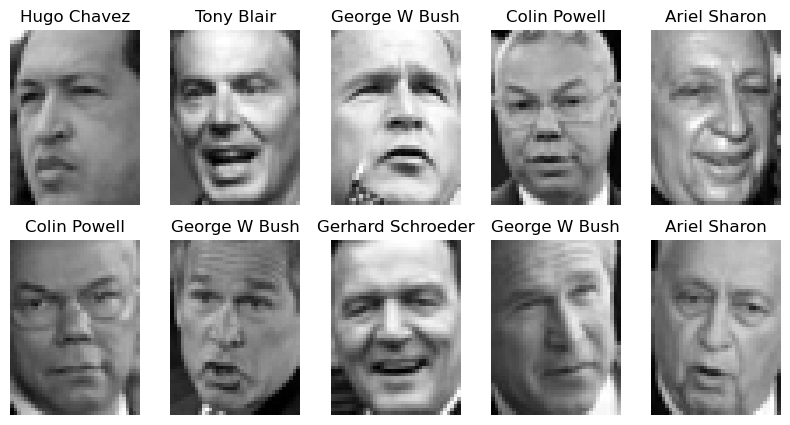


Precisão no treino (antes da otimização): 1.0
Precisão no teste (antes da otimização): 0.8062015503875969

Relatório de classificação inicial:
               precision    recall  f1-score   support

           0       0.76      0.70      0.73        23
           1       0.81      0.89      0.85        71
           2       0.75      0.73      0.74        37
           3       0.87      0.92      0.90       159
           4       0.61      0.58      0.59        33
           5       0.92      0.52      0.67        21
           6       0.72      0.67      0.70        43

    accuracy                           0.81       387
   macro avg       0.78      0.72      0.74       387
weighted avg       0.81      0.81      0.80       387



In [ ]:
# 1. Carregar o Dataset Labeled Faces in the Wild
lfw_dataset = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
X = lfw_dataset.data
y = lfw_dataset.target
target_names = lfw_dataset.target_names

print("Dimensões do dataset:", X.shape)
print("Número de classes:", len(target_names))

# Visualizar algumas imagens do dataset
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(lfw_dataset.images[i], cmap='gray')
    plt.title(target_names[y[i]])
    plt.axis('off')
plt.show()

# 2. Dividir o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Padronizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 3. Treinar uma Rede Neural Multicamada
# Configurar o modelo inicial
mlp = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=500, random_state=42)
mlp.fit(X_train, y_train)

# Avaliar o desempenho inicial
y_train_pred = mlp.predict(X_train)
y_test_pred = mlp.predict(X_test)

print("\nPrecisão no treino (antes da otimização):", accuracy_score(y_train, y_train_pred))
print("Precisão no teste (antes da otimização):", accuracy_score(y_test, y_test_pred))
print("\nRelatório de classificação inicial:\n", classification_report(y_test, y_test_pred))

# 4. Otimizar a Regularização por Validação Cruzada
param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'hidden_layer_sizes': [(128, 64), (64, 32), (256, 128)],
    'learning_rate_init': [0.001, 0.01, 0.1]
}

grid_search = GridSearchCV(
    MLPClassifier(max_iter=1000, random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy'
)
grid_search.fit(X_train, y_train)

print("\nMelhores hiperparâmetros encontrados:", grid_search.best_params_)

# Treinar o modelo final com os melhores hiperparâmetros
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# 5. Avaliar a Rede Neuronal no Subset de Teste
y_test_final = best_model.predict(X_test)

# Métricas de avaliação
final_accuracy = accuracy_score(y_test, y_test_final)
print("\nPrecisão no teste (modelo otimizado):", final_accuracy)
print("\nRelatório de classificação (modelo otimizado):\n", classification_report(y_test, y_test_final))
print("\nMatriz de confusão:\n", confusion_matrix(y_test, y_test_final))

# 6. Representar os Resultados Graficamente
plt.figure(figsize=(8, 6))
conf_matrix = confusion_matrix(y_test, y_test_final)
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.title("Matriz de Confusão")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.xticks(ticks=range(len(target_names)), labels=target_names, rotation=90)
plt.yticks(ticks=range(len(target_names)), labels=target_names)
plt.show()